# Proyecto aplicado: ""
* Andrés Forero
* Daniel Cuellar
* Daniela González

## Librerías 
______

In [1]:
# manejo de data
import pandas as pd
import numpy as np


# visualización
import seaborn as sns
import matplotlib.pyplot as plt


# Metodología CRISP-DM
___
<img src="http://www.iic.uam.es/wp-content/uploads/2021/11/CRISP-DM.jpg" width="400" height="400" />


## Situación actual


## Descripción del dataset
_______________


## Problema
_____


## Objetivos
_____

### General


### Específico 



## Hipótesis (científica o estadística)
------


# Entendimiento de los datos
----

## Carga De Datos
------

In [10]:
data = pd.read_csv("pokemon.csv")

## Describir los datos 
------

In [6]:
data.classfication.value_counts()

classfication
Dragon Pokémon        8
Mouse Pokémon         6
Mushroom Pokémon      6
Flame Pokémon         5
Balloon Pokémon       5
                     ..
Marionette Pokémon    1
Puppet Pokémon        1
Color Swap Pokémon    1
Weather Pokémon       1
Artificial Pokémon    1
Name: count, Length: 588, dtype: int64

In [18]:
data.loc[data.classfication =="Weather Pokémon"]["name"]

350    Castform
Name: name, dtype: object

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [116]:
data.describe().round(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


## Estadística exploratoria
------

In [117]:
# ajuste de categoricas que están como númerica

data = data.astype({'FastingBS':'string'})

def est_exploratoria(data,categoricas):
    """
    tablas de estadística exploratoria
    ---
    data : dataframe
    categoricas : lista con nombre de variables a tratar como categoricas
    
    """
    datos = data.loc[:,~data.columns.isin(categoricas)]

    df0 = datos.agg([lambda x : sum(x.isna()),"count",]).rename(index={"<lambda>": 'Na count'})
    df1 = datos.agg(["mean"])
    df2 = datos.agg(lambda x:pd.Series.mode(x)).rename(index={0: 'mode'})
    df3 = datos.agg(["median","std","var","kurt","skew","max","min"])

    df = pd.DataFrame().append([df0,df1,df2, df3])

    df["Measurement"] = df.index
    df["Type"]=["Structure","Structure","Central t.","Central t.","Central t.","Dispersion","Dispersion","Shape","Shape","Range","Range"]
    df.set_index("Type", append=False, inplace=True)
    df.set_index("Measurement", append=True, inplace=True)

    numerica=df.round(decimals=2)

    datos = data.loc[:,data.columns.isin(categoricas)]
    datos = datos.astype({'HeartDisease':'string'})

    df0 = datos.agg([lambda x : sum(x.isna())]).rename(index={"<lambda>": 'Na count'})

    df = pd.DataFrame().append([df0,datos.describe(include=['object',"string"])])

    categorica=df.round(decimals=2)
    return numerica, categorica

numerica, categorica = est_exploratoria(data,['Sex',"ChestPainType","RestingECG","ExerciseAngina","ST_Slope","HeartDisease","FastingBS"])

numerica


Age  RestingBP  Cholesterol   MaxHR  Oldpeak
Type       Measurement                                                 
Structure  Na count       0.00       0.00         0.00    0.00     0.00
           count        918.00     918.00       918.00  918.00   918.00
Central t. mean          53.51     132.40       198.80  136.81     0.89
           mode          54.00     120.00         0.00  150.00     0.00
           median        54.00     130.00       223.00  138.00     0.60
Dispersion std            9.43      18.51       109.38   25.46     1.07
           var           88.97     342.77     11964.89  648.23     1.14
Shape      kurt          -0.39       3.27         0.12   -0.45     1.20
           skew          -0.20       0.18        -0.61   -0.14     1.02
Range      max           77.00     200.00       603.00  202.00     6.20
           min           28.00       0.00         0.00   60.00    -2.60

In [118]:
categorica

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
Na count,0,0,0,0,0,0,0
count,918,918,918,918,918,918,918
unique,2,4,2,3,2,3,2
top,M,ASY,0,Normal,N,Flat,1
freq,725,496,704,552,547,460,508


## Visualización de datos
------

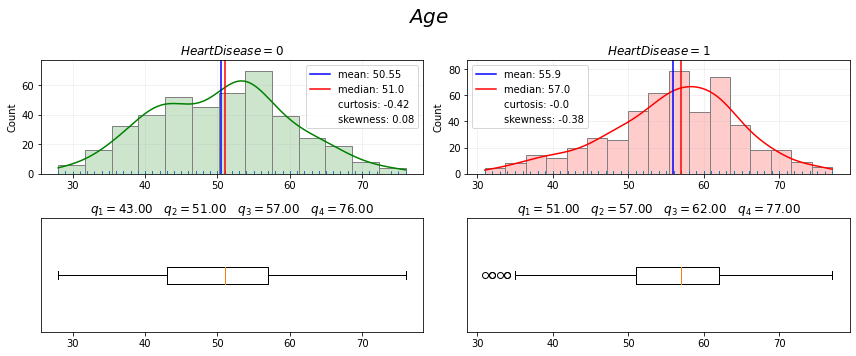

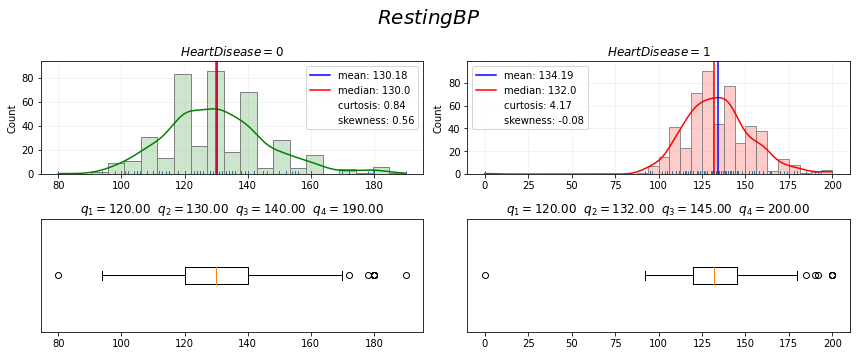

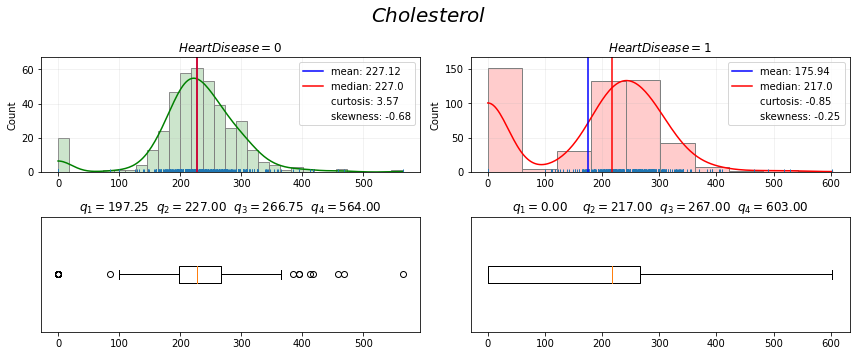

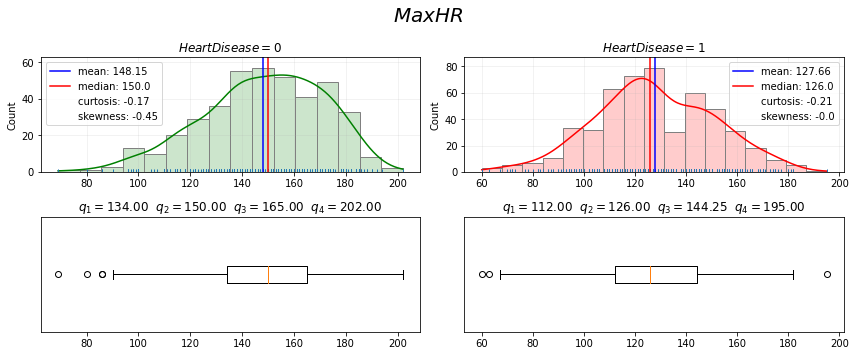

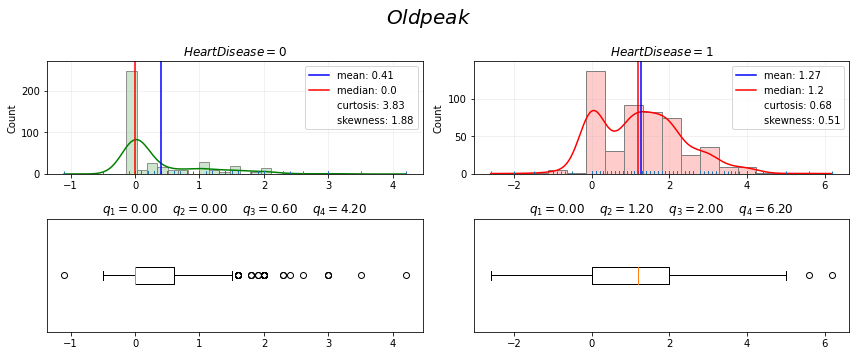

In [120]:
def shape_analysis(data,cols_categoricas):
    """ 
    data: dataframe
    cols_categoricas: lista con nombre de las columnas categoricas

    _______________________________________________________________

    imprime el análisis de forma de las variables númericas (el restante fuera de las categoricas) 


    """

    cols_numericas = data.columns[~data.columns.isin(cols_categoricas)]



    for n in [data.columns.get_loc(i) for i in cols_numericas]:

        caso_0= data[data.HeartDisease==0].iloc[:,[n]]
        caso_1= data[data.HeartDisease==1].iloc[:,[n]]


        fig, axes = plt.subplots(figsize=(12,5),nrows=2,ncols=2)

        fig.suptitle(f"${data.columns[n]}$",size=20)


        caso = caso_0

        #histograma
        # axes[0,0].hist(caso,color="g",alpha=0.2,edgecolor="gray");
        sns.histplot(caso.unstack(), kde=True,color="green",alpha=0.2,edgecolor="gray",ax=axes[0,0])
        sns.rugplot(caso.unstack(),ax=axes[0,0])
        axes[0,0].set_title("$HeartDisease = 0$")
        axes[0,0].grid("gray",alpha=0.2)

        #lineas y metricas
        axes[0,0].axvline([caso.mean()],label=f"mean: {round(caso.mean().item(),2)}",color="blue")
        axes[0,0].axvline([caso.median()],label=f"median: {round(caso.median().item(),2)}",color="red")

        axes[0,0].axvline([caso.mean()],label=f"curtosis: {round(sp.stats.kurtosis(caso).item(),2)}",color="none")
        axes[0,0].axvline([caso.mean()],label=f"skewness: {round(sp.stats.skew(caso).item(),2)}",color="none")
        axes[0,0].legend()


        #boxplot
        axes[1,0].boxplot(caso,vert=False)
        axes[1,0].yaxis.set_visible(False)

        textstr = '\t'.join((
            r'$q_{1}=%.2f$' % (np.quantile( caso,0.25),),
            r'$q_{2}=%.2f$' % (np.quantile( caso,0.50), ),
            r'$q_{3}=%.2f$' % (np.quantile( caso,0.75), ),
            r'$q_{4}=%.2f$' % (np.quantile( caso,1), )))

        axes[1,0].set_title(textstr)


        caso = caso_1

        #histograma
        # axes[0,1].hist(caso,color="r",alpha=0.2,edgecolor="gray")
        sns.histplot(caso.unstack(), kde=True,color="red",alpha=0.2,edgecolor="gray",ax=axes[0,1])
        sns.rugplot(caso.unstack(),ax=axes[0,1])  
        axes[0,1].set_title("$HeartDisease = 1$")
        axes[0,1].grid("gray",alpha=0.2)

        #lineas y metricas
        axes[0,1].axvline([caso.mean()],label=f"mean: {round(caso.mean().item(),2)}",color="blue")
        axes[0,1].axvline([caso.median()],label=f"median: {round(caso.median().item(),2)}",color="red")

        axes[0,1].axvline([caso.mean()],label=f"curtosis: {round(sp.stats.kurtosis(caso).item(),2)}",color="none")
        axes[0,1].axvline([caso.mean()],label=f"skewness: {round(sp.stats.skew(caso).item(),2)}",color="none")
        axes[0,1].legend()

        #boxplot
        axes[1,1].boxplot(caso,vert=False)
        axes[1,1].yaxis.set_visible(False)

        textstr = '\t'.join((
            r'$q_{1}=%.2f$' % (np.quantile( caso,0.25),),
            r'$q_{2}=%.2f$' % (np.quantile( caso,0.50), ),
            r'$q_{3}=%.2f$' % (np.quantile( caso,0.75), ),
            r'$q_{4}=%.2f$' % (np.quantile( caso,1), )))

        axes[1,1].set_title(textstr)



        fig.tight_layout()

categoricas =['Sex',"ChestPainType","RestingECG","ExerciseAngina","ST_Slope","FastingBS","HeartDisease"]

shape_analysis(data,categoricas)


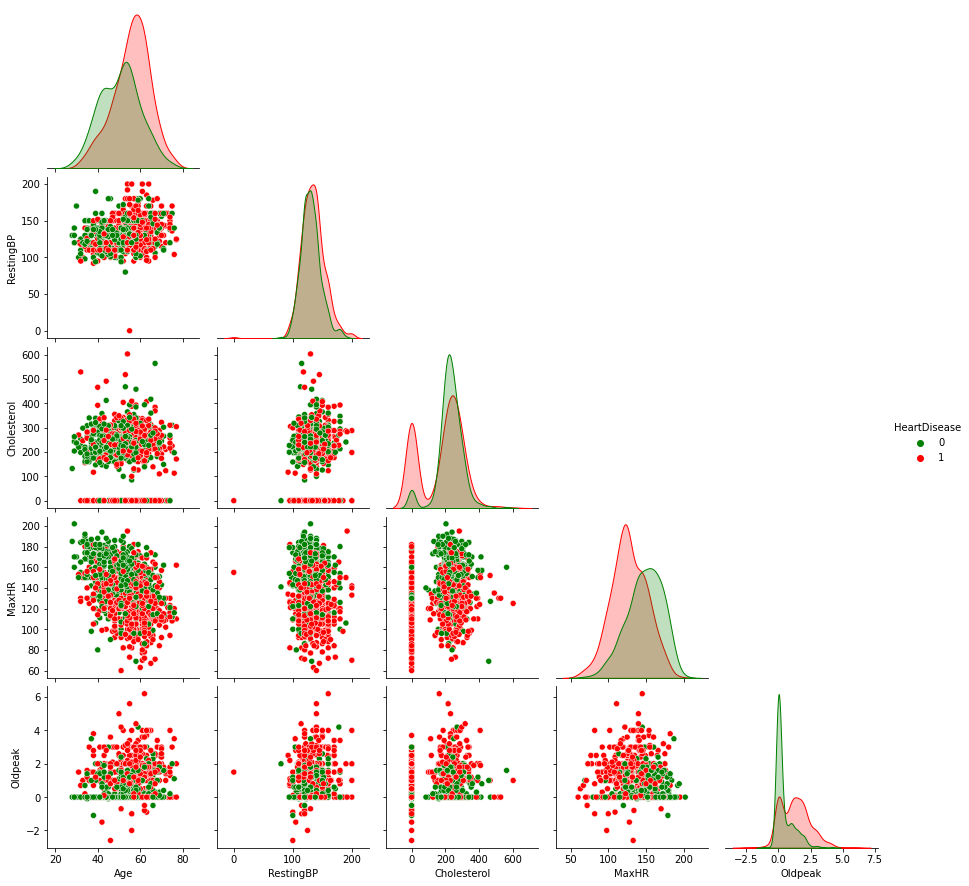

In [122]:
sns.pairplot(data,hue="HeartDisease",
             corner=True,
             palette=sns.color_palette(["green","red"]))


# Preparación de datos
---

## Análisis de datos faltantes e imputaciones
----

In [123]:
# datos fuera de rango
print("Fuera de rango RestingBP : ",data[(data["RestingBP"]<60) | (data["RestingBP"]>200)].shape[0])
print("Fuera de rango Cholesterol : ",data[(data["Cholesterol"]<120) | (data["Cholesterol"]>600)].shape[0])
print("Fuera de rango Oldpeak : ",data[(data["Oldpeak"]<0) | (data["Oldpeak"]>6.2)].shape[0])


Fuera de rango RestingBP :  1
Fuera de rango Cholesterol :  179
Fuera de rango Oldpeak :  13


## Filtros
----

Como se explica en la sección anterior, se filtran los registros con caracterísitcas fuera de rango (escala común).

In [124]:
print("Longitud original:",data.shape[0])

data_fixed = data[(data["RestingBP"]>=60) & (data["RestingBP"]<=200) &
     (data["Cholesterol"]>=120) & (data["Cholesterol"]<=600) & 
     (data["Oldpeak"]>=0) & (data["Oldpeak"]<=6.2)]

print("Registros eliminados:",data.shape[0]-data_fixed.shape[0])
print("Nueva longitud:",data_fixed.shape[0])

Longitud original: 918
Registros eliminados: 180
Nueva longitud: 738


## Agrupaciones
----

In [125]:
data_fixed.groupby(["Sex","HeartDisease"]).agg(["mean","size"]).round(2)

Age      RestingBP      Cholesterol        MaxHR       \
                   mean size      mean size        mean size    mean size   
Sex HeartDisease                                                            
F   0             51.12  142    128.77  142      249.18  142  149.18  142   
    1             56.02   40    143.38   40      279.18   40  139.25   40   
M   0             49.65  245    131.00  245      234.24  245  149.05  245   
    1             55.78  311    135.53  311      248.13  311  129.58  311   

                 Oldpeak       
                    mean size  
Sex HeartDisease               
F   0               0.44  142  
    1               1.47   40  
M   0               0.37  245  
    1               1.45  311

Parece existir una diferencia entre las medias de las variables dado el sexo y si padecen enfermedad cardíaca, se procederá a analizar si realmente son significativas estas diferencias.

## Construccion de tablas pivote y crosstab
----

Tras ver la relación del *MaxHR* por *RestingECG* en el análisis gráfico, se desea ver el valor medio separado por el clasificador principal *HeartDisease*.

In [126]:
data_fixed.pivot_table(index="ChestPainType",columns="HeartDisease",values="MaxHR",aggfunc="mean").round(2)

HeartDisease,0,1
ChestPainType,,
ASY,139.52,128.17
ATA,152.90,141.52
NAP,151.78,134.98
TA,150.50,147.73


* Se puede observar una menor media de "MaxHR" si el paciente padece enfermedad cardíaca, esto, para cada categoría de "ChestPainType".

# Análisis de datos


## Pruebas de correlación
----


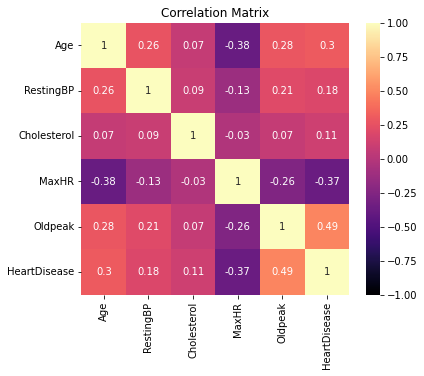

In [127]:
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.heatmap(data_fixed.corr().round(2),cmap='magma',vmin=-1,annot=True)
ax.set_title("Correlation Matrix");

In [128]:

def tabla_corr_pearson(data_fixed,alfa,umbral):
  newdf = data_fixed.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
  result = []


  for i in newdf.columns:
    for j in newdf.columns:
      if i!=j:
        coef, p = stats.pearsonr(newdf[i], newdf[j])
        result.append([i,j,coef,p < alfa,p])

  correlaciones = pd.DataFrame(result,columns=["Var_i","Var_j","Coef_corr","Correlacionada","p_value"])


  return correlaciones[(correlaciones.Correlacionada==True) & (abs(correlaciones.Coef_corr)>=umbral)].drop_duplicates(["Coef_corr","p_value"])


tabla_corr_pearson(data_fixed,0.05,0.25)

,Var_i,Var_j,Coef_corr,Correlacionada,p_value
0,Age,RestingBP,0.263209,True,3.682124e-13
2,Age,MaxHR,-0.380071,True,8.926298e-27
3,Age,Oldpeak,0.282540,True,5.180863e-15
4,Age,HeartDisease,0.296911,True,1.739944e-16
18,MaxHR,Oldpeak,-0.256683,True,1.439216e-12
19,MaxHR,HeartDisease,-0.374328,True,5.813654e-26
24,Oldpeak,HeartDisease,0.491489,True,3.851994e-46


## Construcción de intervalos de confianza
----

In [129]:
def limite_confianza_por_heartdisease(data, variable, confianza):

  
  limite_inferior_0, limite_superior_0 = sm.stats.DescrStatsW(data.loc[data.HeartDisease==0,variable]).tconfint_mean(alpha = 1-confianza)
  mean_0 = data.loc[data.HeartDisease==0,variable].mean()
  limite_inferior_1, limite_superior_1 = sm.stats.DescrStatsW(data.loc[data.HeartDisease==1,variable]).tconfint_mean(alpha = 1-confianza)
  mean_1 = data.loc[data.HeartDisease==1,variable].mean()
    
  result = pd.DataFrame([[variable,
                          [limite_inferior_0.round(4),mean_0.round(4),limite_superior_0.round(4)],
                          [limite_inferior_1.round(4),mean_1.round(4),limite_superior_1.round(4)]]],
                        columns=["variable","LI media LS hd:0","LI media LS hd:1"])
  return result.round(2)

tabla_medias=pd.DataFrame(columns=["variable","LI media LS hd:0","LI media LS hd:1"])

variables = data_fixed.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.drop("HeartDisease")

for i in variables:
    tabla_medias = tabla_medias.append(limite_confianza_por_heartdisease(data_fixed,i, 0.95))

display(tabla_medias)

,variable,LI media LS hd:0,LI media LS hd:1
0,Age,"[49.2611, 50.1912, 51.1213]","[54.8947, 55.812, 56.7292]"
0,RestingBP,"[128.5664, 130.1835, 131.8005]","[134.5531, 136.4245, 138.2959]"
0,Cholesterol,"[234.2843, 239.7261, 245.1679]","[245.5678, 251.6667, 257.7655]"
0,MaxHR,"[146.7832, 149.1008, 151.4184]","[128.3254, 130.6781, 133.0308]"
0,Oldpeak,"[0.3293, 0.3972, 0.465]","[1.3294, 1.4501, 1.5708]"


> **_Nota:_**  hd: HeartDisease.

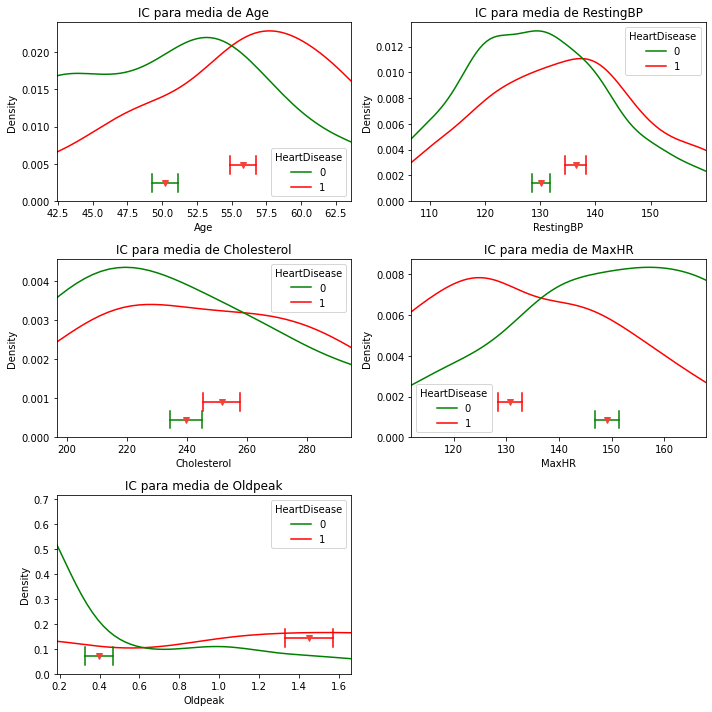

In [130]:
fig,ax = plt.subplots(figsize=(10,10),nrows=3,ncols=2)

n=0
for i in range(3):
    for j in range(2):
        if n < len(variables):    
            lim=limite_confianza_por_heartdisease(data_fixed,variables[n], 0.95)
            sns.kdeplot(ax=ax[i,j],data=data_fixed, x=variables[n],hue="HeartDisease",palette=["green","red"])


            li_0 =lim.iloc[0][1][0]
            med_0 =lim.iloc[0][1][1]
            ls_0 =lim.iloc[0][1][2]

            li_1 =lim.iloc[0][2][0]
            med_1 =lim.iloc[0][2][1]
            ls_1 =lim.iloc[0][2][2]

            centro = (med_0+med_1)/2

            if variables[n]=="Oldpeak":
                ax[i,j].set_xlim([centro*0.20,centro*1.80])
            else:
                ax[i,j].set_xlim([centro*0.80,centro*1.20])

            #intervalo de confianza para hd:0
            color="green"
            ax[i,j].plot([li_0, ls_0], [ax[i,j].get_ylim()[1]*0.1, ax[i,j].get_ylim()[1]*0.1],color=color)
            ax[i,j].plot(med_0, ax[i,j].get_ylim()[1]*0.1, 'v', color='#f44336')
            ax[i,j].plot([li_0, li_0], [ax[i,j].get_ylim()[1]*0.05, ax[i,j].get_ylim()[1]*0.15],color=color)
            ax[i,j].plot([ls_0, ls_0], [ax[i,j].get_ylim()[1]*0.05, ax[i,j].get_ylim()[1]*0.15],color=color)


            #intervalo de confianza para hd:1
            color="red"
            ax[i,j].plot([li_1, ls_1], [ax[i,j].get_ylim()[1]*0.2, ax[i,j].get_ylim()[1]*0.2],color=color)
            ax[i,j].plot(med_1, ax[i,j].get_ylim()[1]*0.2, 'v', color='#f44336')
            ax[i,j].plot([li_1, li_1], [ax[i,j].get_ylim()[1]*0.15, ax[i,j].get_ylim()[1]*0.25],color=color)
            ax[i,j].plot([ls_1, ls_1], [ax[i,j].get_ylim()[1]*0.15, ax[i,j].get_ylim()[1]*0.25],color=color)

            ax[i,j].set_title(f"IC para media de {variables[n]}");
            n+=1

        else:
            ax[i,j].axis("off")

fig.tight_layout()

## Prueba de hipótesis
-----

In [131]:
def test_hipotesis_dos_colas_por_heartdisease(data_fixed,variable):

    Categoria0 = data_fixed.loc[data_fixed.HeartDisease == 0,variable]
    Categoria1 = data_fixed.loc[data_fixed.HeartDisease == 1,variable]

    z, pvalor = sm.stats.ztest(Categoria0, Categoria1,value=0,alternative='two-sided')
    
    return z, pvalor, pvalor<0.05


def diferencia_medias(data):

    data=data_fixed

    result=[]

    columnas_numericas = data_fixed.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.drop("HeartDisease")

    for i in range(len(columnas_numericas)):

        value=test_hipotesis_dos_colas_por_heartdisease(data_fixed,columnas_numericas[i])
        result.append([columnas_numericas[i],value[0],value[1],value[2]])

    result = pd.DataFrame(result,columns=["Variable","z_score","p-value","Significativo"])

    return result.round(4)

print("Diferencia de medias por HeartDisease")
diferencia_medias(data_fixed)

Diferencia de medias por HeartDisease


,Variable,z_score,p-value,Significativo
0,Age,-8.4354,0.000,True
1,RestingBP,-4.9857,0.000,True
2,Cholesterol,-2.8818,0.004,True
3,MaxHR,10.9515,0.000,True
4,Oldpeak,-15.3106,0.000,True


In [132]:
data_fixed.groupby(["HeartDisease"]).agg("mean").round(4)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
HeartDisease,,,,,
0,50.1912,130.1835,239.7261,149.1008,0.3972
1,55.8120,136.4245,251.6667,130.6781,1.4501


In [133]:
def test_hipotesis_una_cola(variable,value,tipo):
    
    z, pvalor = sm.stats.ztest(variable,value=value,alternative=tipo)
    
    return z.round(4), pvalor.round(15), pvalor<0.05


result=[ 
test_hipotesis_una_cola(data_fixed.loc[data_fixed.HeartDisease==0,"Age"],
                        data_fixed.loc[data_fixed.HeartDisease==1,"Age"].mean(),
                        "smaller"),

test_hipotesis_una_cola(data_fixed.loc[data_fixed.HeartDisease==0,"RestingBP"],
                        data_fixed.loc[data_fixed.HeartDisease==1,"RestingBP"].mean(),
                        "smaller"),

test_hipotesis_una_cola(data_fixed.loc[data_fixed.HeartDisease==0,"Cholesterol"],
                        data_fixed.loc[data_fixed.HeartDisease==1,"Cholesterol"].mean(),
                        "smaller"),

test_hipotesis_una_cola(data_fixed.loc[data_fixed.HeartDisease==0,"MaxHR"],
                        data_fixed.loc[data_fixed.HeartDisease==1,"MaxHR"].mean(),
                        "larger"),

test_hipotesis_una_cola(data_fixed.loc[data_fixed.HeartDisease==0,"Oldpeak"],
                        data_fixed.loc[data_fixed.HeartDisease==1,"Oldpeak"].mean(),
                        "smaller")]

result = pd.DataFrame([["Age hd0 < Age hd1",result[0][0],result[0][1],result[0][2]],
["RestingBP hd0 < RestingBP hd1",result[1][0],result[1][1],result[1][2]],
["Cholesterol hd0 < Cholesterol hd1",result[2][0],result[2][1],result[2][2]],
["MaxHR hd0 > MaxHR hd1",result[3][0],result[3][1],result[3][2]],
["Oldpeak hd0 < Oldpeak hd1",result[4][0],result[4][1],result[4][2]]],
columns=["Hipótesis alterna","z_score","p_value","rechaza H0"])

result

,Hipótesis alterna,z_score,p_value,rechaza H0
0,Age hd0 < Age hd1,-11.8820,0.000000e+00,True
1,RestingBP hd0 < RestingBP hd1,-7.5883,1.600000e-14,True
2,Cholesterol hd0 < Cholesterol hd1,-4.3141,8.012261e-06,True
3,MaxHR hd0 > MaxHR hd1,15.6289,0.000000e+00,True
4,Oldpeak hd0 < Oldpeak hd1,-30.4969,0.000000e+00,True


## Gráficos avanzados
---

In [134]:
variables_numericas = data_fixed.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.drop("HeartDisease")

variables_categoricas = data.columns[~data.columns.isin(cols_numericas)].drop("HeartDisease")


Tomando la variable "ChestPainType" se pueden observar que existe mayor cantidad de registros para asintomáticos enfermos.


## Transformación de variables categóricas a Dummy
---

In [139]:
data_fixed = pd.get_dummies(data=data_fixed, columns=["Sex", "ChestPainType", "FastingBS","RestingECG","ExerciseAngina","ST_Slope"])

## Análisis de regresión y clasificación n-aria 
-----

### Modelo de regresión lineal

### Modelo de regresión logística

# Conclusiones
----